In [25]:
# Dependencies
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import requests
import time
import json

# Import API key
from config import weather_api_key

# Incorporate citipy
from citipy import citipy

# Output file
output_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [26]:
## Generate Cities List
# Create lists
lat_lngs = []
cities = []

# Create random coordinates
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)

# Print city count
len(cities)

611

In [27]:
## Perform API calls
# Identify URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
query_url = f"{url}&q="

# Create lists
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []
count = 1

# Print list of cities
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    print(f"Processing Record {count} | {city}")
    count += 1

Beginning Data Retrieval
-----------------------------
Processing Record 1 | rikitea
Processing Record 2 | busselton
Processing Record 3 | san patricio
Processing Record 4 | yellowknife
Processing Record 5 | bredasdorp
Processing Record 6 | ushuaia
Processing Record 7 | korla
Processing Record 8 | georgetown
Processing Record 9 | raton
Processing Record 10 | mount gambier
Processing Record 11 | tuktoyaktuk
Processing Record 12 | attawapiskat
Processing Record 13 | port alfred
Processing Record 14 | sentyabrskiy
Processing Record 15 | chaman
Processing Record 16 | husavik
Processing Record 17 | jamestown
Processing Record 18 | thompson
Processing Record 19 | vila velha
Processing Record 20 | chokurdakh
Processing Record 21 | atuona
Processing Record 22 | mataura
Processing Record 23 | umzimvubu
Processing Record 24 | sena madureira
Processing Record 25 | yumen
Processing Record 26 | vestmannaeyjar
Processing Record 27 | pisco
Processing Record 28 | ciras
Processing Record 29 | kidal
Pro

In [28]:
## Convert raw data to DataFrame
# Request data from each city
for city in cities:
    response = requests.get(query_url+city).json()
    try:
        lat.append(response['coord']['lat'])
    except:
        continue
    city_name.append(response['name'])
    lng.append(response['coord']['lon'])
    max_temp.append(response['main']['temp_max'])
    humidity.append(response['main']['humidity'])
    cloudiness.append(response['clouds']['all'])
    windspeed.append(response['wind']['speed'])
    country.append(response['sys']['country'])
    date.append(response['dt'])

# Create DataFrame
cities_df = pd.DataFrame({'City': city_name, 'Latitude': lat, 'Longitude': lng, 'Max Temperature': max_temp, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Wind Speed': windspeed, 'Country': country, 'Date': date})
cities_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.40,72,89,4.81,PF,1611923653
1,Busselton,-33.6500,115.3333,71.01,70,0,1.99,AU,1611923653
2,San Patricio,28.0170,-97.5169,51.80,87,1,6.11,US,1611923655
3,Yellowknife,62.4560,-114.3525,-23.80,76,1,6.91,CA,1611923655
4,Bredasdorp,-34.5322,20.0403,78.01,53,0,1.01,ZA,1611923656


In [31]:
# Export data into csv
cities_final = cities_df.to_csv("../Resources/WeatherPyCities.csv")

In [33]:
# Check for cities where humidity > 100%
cities_humidity_check = cities_df[cities_df["Humidity"]>100]
cities_humidity_check
# No cities

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
## Plotting the Data

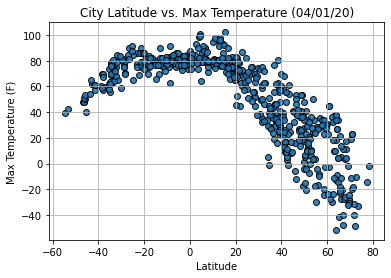

In [49]:
## Latitude vs. Temperature Plot
x_axis = cities_df["Latitude"]
max_temp_y_axis = cities_df["Max Temperature"]
plt.scatter(x_axis, max_temp_y_axis, edgecolors="black", alpha=0.9)
plt.grid(True)
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
lat_vs_temp = plt.savefig("../Images/LatitudeVsMaxTemp.png")

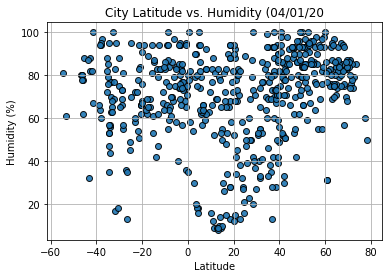

In [50]:
## Latitude vs. Humidity Plot
humidity_y_axis = cities_df["Humidity"]
plt.scatter(x_axis, humidity_y_axis, edgecolors="black", alpha=0.9)
plt.grid(True)
plt.title("City Latitude vs. Humidity (04/01/20")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
lat_vs_humidity = plt.savefig("../Images/LatitudeVsHumidity.png")

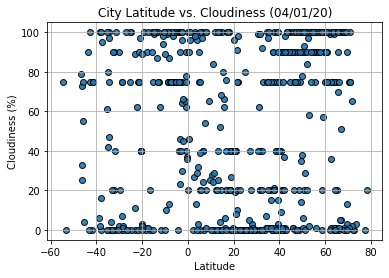

In [51]:
## Latitude vs. Cloudiness Plot
cloudiness_y_axis = cities_df["Cloudiness"]
plt.scatter(x_axis, cloudiness_y_axis, edgecolors="black", alpha=0.9)
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
lat_vs_cloudiness = plt.savefig("../Images/LatitudeVsCloudiness.png")

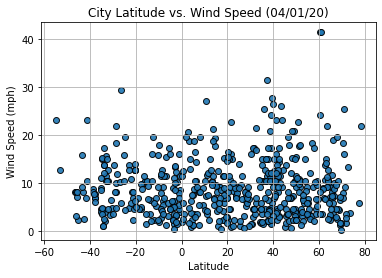

In [52]:
## Latitude vs. Wind Speed Plot
windspeed_y_axis = cities_df["Wind Speed"]
plt.scatter(x_axis, windspeed_y_axis, edgecolors="black", alpha=0.9)
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
lat_vs_windspeed = plt.savefig("../Images/LatitudeVsWindSpeed.png")

In [57]:
## Linear Regression
from scipy.stats import linregress
import datetime as dt 

In [54]:
# Create Northern and Southern Hemisphere DataFrames
# Northern
nth_hemi_df = cities_df[cities_df["Latitude"]>0]
nth_hemi_df

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
2,San Patricio,28.0170,-97.5169,51.80,87,1,6.11,US,1611923655
3,Yellowknife,62.4560,-114.3525,-23.80,76,1,6.91,CA,1611923655
6,Korla,41.7597,86.1469,26.01,81,0,2.26,CN,1611923657
7,George Town,5.4112,100.3354,86.00,74,20,3.44,MY,1611923628
8,Raton,36.9034,-104.4391,19.40,73,1,10.36,US,1611923659
...,...,...,...,...,...,...,...,...,...
547,Tateyama,34.9833,139.8667,43.00,46,97,1.81,JP,1611924078
549,Taos,36.4072,-105.5731,24.01,79,1,6.91,US,1611924080
550,Deputatsky,69.3000,139.9000,-32.67,86,100,1.61,RU,1611924080
551,Khon Kaen,16.5000,102.0833,74.62,48,76,2.01,TH,1611924081


In [55]:
# Southern
sth_hemi_df = cities_df[cities_df["Latitude"]<0]
sth_hemi_df

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.40,72,89,4.81,PF,1611923653
1,Busselton,-33.6500,115.3333,71.01,70,0,1.99,AU,1611923653
4,Bredasdorp,-34.5322,20.0403,78.01,53,0,1.01,ZA,1611923656
5,Ushuaia,-54.8000,-68.3000,39.20,81,75,23.02,AR,1611923485
9,Mount Gambier,-37.8333,140.7667,57.20,94,16,6.91,AU,1611923659
...,...,...,...,...,...,...,...,...,...
536,Barabai,-2.5833,115.3833,76.35,82,100,1.81,ID,1611923950
538,Clarence Town,-32.5833,151.7833,72.00,100,90,10.36,AU,1611924073
542,Ballitoville,-29.5390,31.2144,80.60,65,20,13.80,ZA,1611924075
548,Colesberg,-30.7200,25.0972,83.89,18,0,6.31,ZA,1611924079


The r-value is: -0.8670504453451354


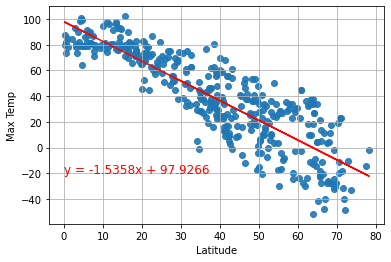

In [65]:
## Northern Hemisphere - Max Temp vs. Latitude Linear Regression
nth_max_temp = nth_hemi_df["Max Temperature"]
nth_lat = nth_hemi_df["Latitude"]

# Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(nth_lat, nth_max_temp)
regress_values = nth_lat * slope + intercept
linear_equation = "y = " + str(round(slope, 4)) + "x + " + str(round(intercept, 4))

# Create scatterplot
plt.scatter(nth_lat, nth_max_temp, alpha=0.9)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(nth_lat, regress_values, "r-")
plt.annotate(linear_equation,(0,-20), fontsize = 12, color = "red")

# Calculate and print r value
print("The r-value is: " + str(rvalue))

# Save as image
plt.savefig("../Images/NthHemiMaxTempRegression.png")

The r-value is: 0.6771073774313886


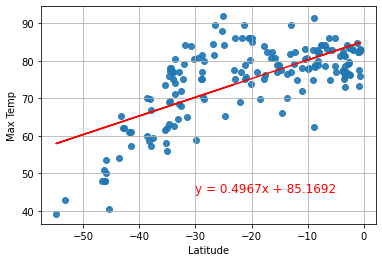

In [80]:
## Southern Hemisphere - Max Temp vs. Latitude Linear Regression
sth_max_temp = sth_hemi_df["Max Temperature"]
sth_lat = sth_hemi_df["Latitude"]

# Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(sth_lat, sth_max_temp)
regress_values = sth_lat * slope + intercept
linear_equation = "y = " + str(round(slope, 4)) + "x + " + str(round(intercept, 4))

# Create scatterplot
plt.scatter(sth_lat, sth_max_temp, alpha=0.9)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(sth_lat, regress_values, "r-")
plt.annotate(linear_equation,(-30,45), fontsize = 12, color = "red")

# Calculate and print r value
print("The r-value is: " + str(rvalue))

# Save as image
plt.savefig("../Images/SthHemiMaxTempRegression.png")

The r-value is: 0.383666454225787


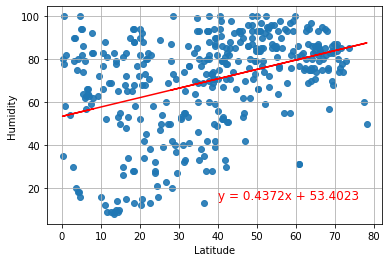

In [79]:
## Northern Hemisphere - Humidity vs. Latitude Linear Regression
nth_humidity = nth_hemi_df["Humidity"]
nth_lat = nth_hemi_df["Latitude"]

# Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(nth_lat, nth_humidity)
regress_values = nth_lat * slope + intercept
linear_equation = "y = " + str(round(slope, 4)) + "x + " + str(round(intercept, 4))

# Create scatterplot
plt.scatter(nth_lat, nth_humidity, alpha=0.9)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(nth_lat, regress_values, "r-")
plt.annotate(linear_equation,(40,15), fontsize = 12, color = "red")

# Calculate and print r value
print("The r-value is: " + str(rvalue))

# Save as image
plt.savefig("../Images/NthHemiHumidityRegression.png")

The r-value is: 0.10586312847892082


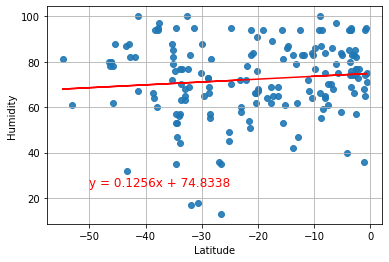

In [78]:
## Southern Hemisphere - Humidity vs. Latitude Linear Regression
sth_humidity = sth_hemi_df["Humidity"]
sth_lat = sth_hemi_df["Latitude"]

# Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(sth_lat, sth_humidity)
regress_values = sth_lat * slope + intercept
linear_equation = "y = " + str(round(slope, 4)) + "x + " + str(round(intercept, 4))

# Create scatterplot
plt.scatter(sth_lat, sth_humidity, alpha=0.9)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(sth_lat, regress_values, "r-")
plt.annotate(linear_equation,(-50,25), fontsize = 12, color = "red")

# Calculate and print r value
print("The r-value is: " + str(rvalue))

# Save as image
plt.savefig("../Images/SthHemiHumidityRegression.png")

The r-value is: 0.2030861775792994


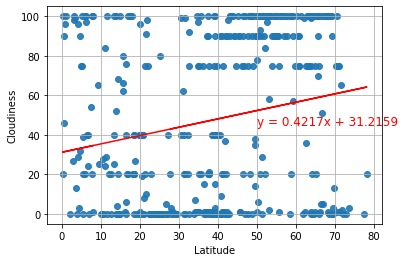

In [77]:
## Northern Hemisphere - Cloudiness vs. Latitude Linear Regression
nth_cloudiness = nth_hemi_df["Cloudiness"]
nth_lat = nth_hemi_df["Latitude"]

# Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(nth_lat, nth_cloudiness)
regress_values = nth_lat * slope + intercept
linear_equation = "y = " + str(round(slope, 4)) + "x + " + str(round(intercept, 4))

# Create scatterplot
plt.scatter(nth_lat, nth_cloudiness, alpha=0.9)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(nth_lat, regress_values, "r-")
plt.annotate(linear_equation,(50,45), fontsize = 12, color = "red")

# Calculate and print r value
print("The r-value is: " + str(rvalue))

# Save as image
plt.savefig("../Images/NthHemiCloudinessRegression.png")



The r-value is: 0.33269505221184403


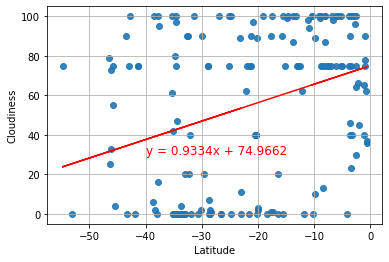

In [76]:
## Southern Hemisphere - Cloudiness vs. Latitude Linear Regression
sth_cloudiness = sth_hemi_df["Cloudiness"]
sth_lat = sth_hemi_df["Latitude"]

# Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(sth_lat, sth_cloudiness)
regress_values = sth_lat * slope + intercept
linear_equation = "y = " + str(round(slope, 4)) + "x + " + str(round(intercept, 4))

# Create scatterplot
plt.scatter(sth_lat, sth_cloudiness, alpha=0.9)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(sth_lat, regress_values, "r-")
plt.annotate(linear_equation,(-40,30), fontsize = 12, color = "red")

# Calculate and print r value
print("The r-value is: " + str(rvalue))

# Save as image
plt.savefig("../Images/SthHemiCloudinessRegression.png")



The r-value is: 0.023499270009912768


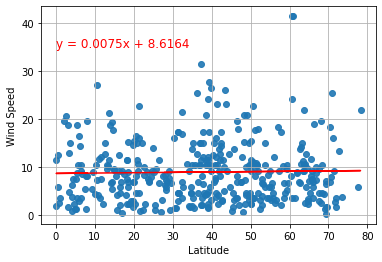

In [75]:
## Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
nth_windspeed = nth_hemi_df["Wind Speed"]
nth_lat = nth_hemi_df["Latitude"]

# Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(nth_lat, nth_windspeed)
regress_values = nth_lat * slope + intercept
linear_equation = "y = " + str(round(slope, 4)) + "x + " + str(round(intercept, 4))

# Create scatterplot
plt.scatter(nth_lat, nth_windspeed, alpha=0.9)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(nth_lat, regress_values, "r-")
plt.annotate(linear_equation,(0,35), fontsize = 12, color = "red")

# Calculate and print r value
print("The r-value is: " + str(rvalue))

# Save as image
plt.savefig("../Images/NthHemiWindSpeedRegression.png")



The r-value is: -0.16147882091771296


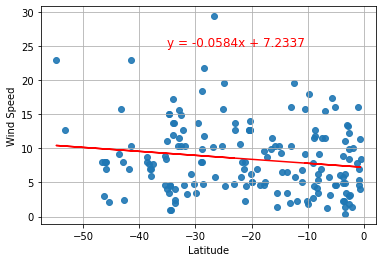

In [82]:
## Southern Hemisphere - Wind Speed vs. Latitude Linear Regression
sth_windspeed = sth_hemi_df["Wind Speed"]
sth_lat = sth_hemi_df["Latitude"]

# Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(sth_lat, sth_windspeed)
regress_values = sth_lat * slope + intercept
linear_equation = "y = " + str(round(slope, 4)) + "x + " + str(round(intercept, 4))

# Create scatterplot
plt.scatter(sth_lat, sth_windspeed, alpha=0.9)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(sth_lat, regress_values, "r-")
plt.annotate(linear_equation,(-35,25), fontsize = 12, color = "red")

# Calculate and print r value
print("The r-value is: " + str(rvalue))

# Save as image
plt.savefig("../Images/SthHemiWindSpeedRegression.png")